## 가중치 초기화

적당한 위치에서 출발하여 제대로 최적해를 찾을 수 있기 위해선 적당한 위치를 찾는 것이 중요한데 우린 이것을 모델 초기화라고합니다. 가중치는 모델 파라미터에서 가장 큰 비중을 차지하기에 초기화 방식에 따라 성능의 차이가 생길 수 밖에 없습니다. 그래서 우리는 어떻게 초기화를 하는지를 알아야 잘 초기화하고 고성능 모델을 만들 수 있게 됩니다.

### 상수 초기화

최적해 정보가 없을 시 가장 간단하게 할 수 있는 방법은 임의의 상수로 초기화 시키기입니다.

#### 가중치를 0으로 초기화 

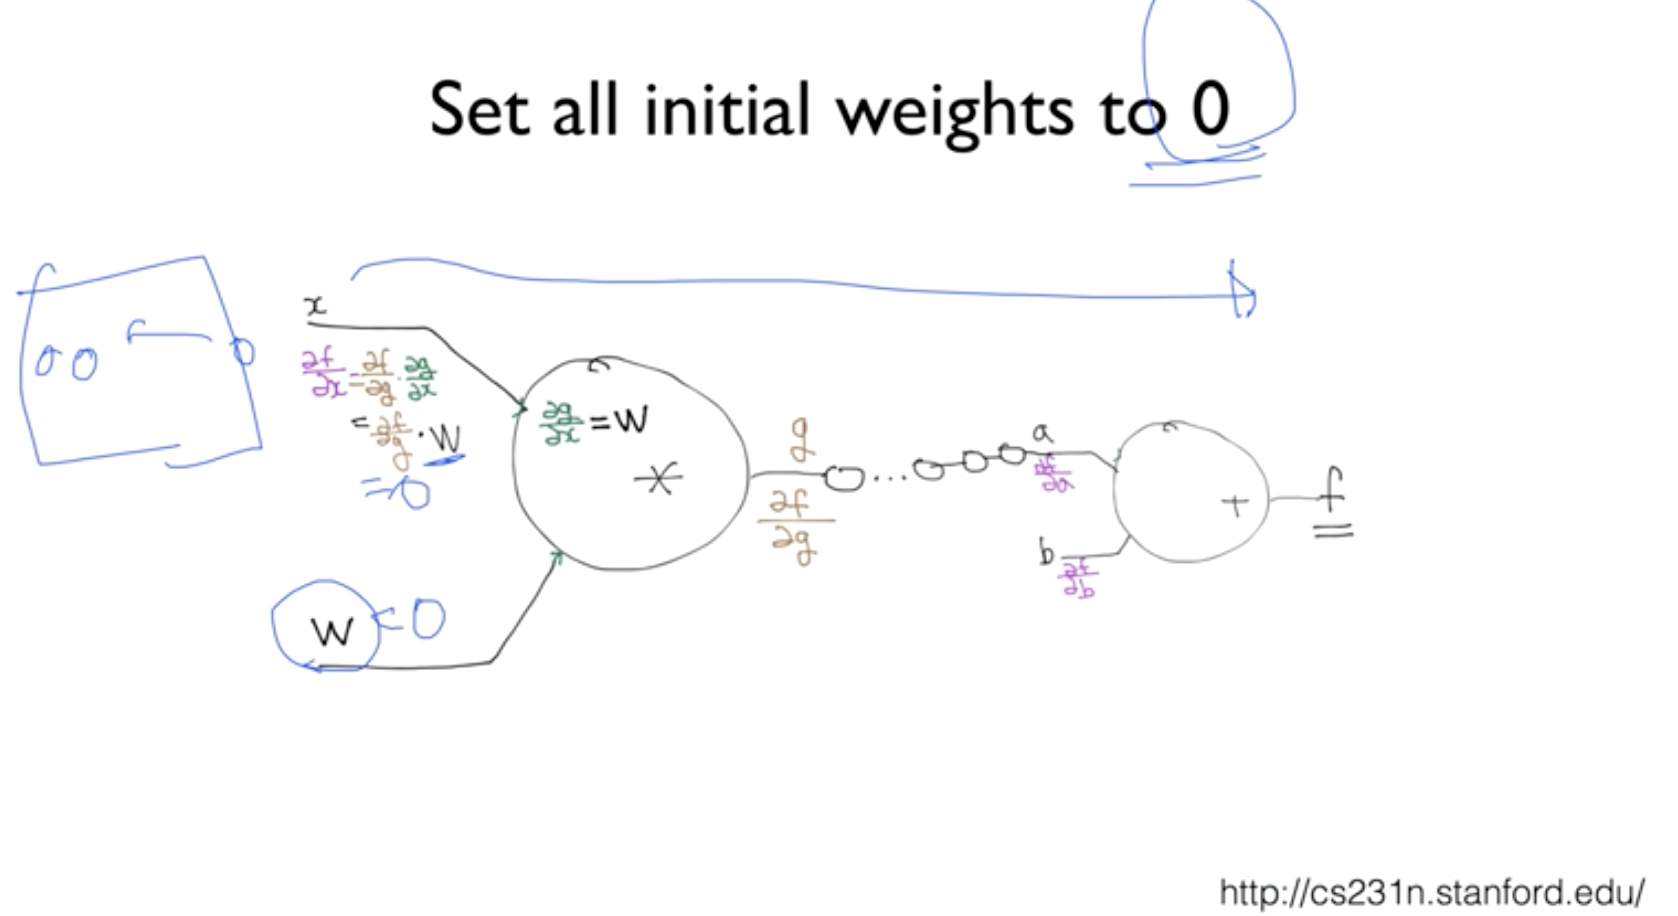

뉴런의 가중치가 0이면 당연히 합산 결과 또한 0이고, 활성함수는 0을 입력 받아서 같은 값만 출력한다. 이 출력값들은 의미가 없고 역전파도 이뤄지지 않아서 학습이 진행되지 않게 됩니다.

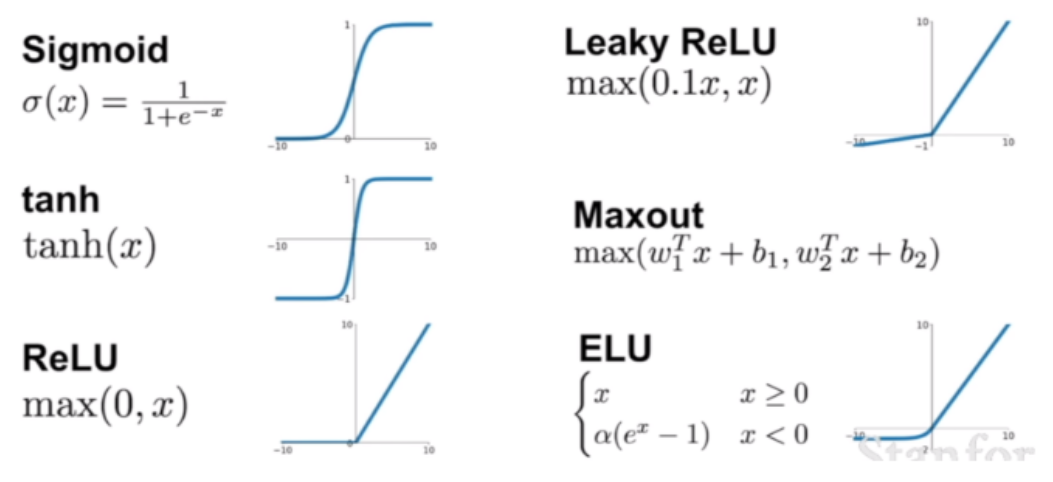

- 활성함수

   - ReLU의 출력: 0
   
   - 하이퍼볼릭 탄젠트 출력: 0
   
   - 시그모이드 출력: 0
   
   - 소프트맥스 : 모든 클래스의 확률이 동일해지니까 균등 분포를 출력한다
   

#### 가중치를 상수로 초기화

은닉 뉴런는 입력 값과 가중치 값이 같아서 가중 합산의 결과와 활성 함수의 실행 결과도 같게 된다. 그로 인해 뉴런의 갯수는 많더라도 신경망에 대칭성이 생겨서 실제로는 하나의 뉴런만 있는 것 같은 성능저하 효과를 불러일으킵니다.

### 가우시안 분포 초기화

대칭성을 피하려면 가중치를 당연히 다 다른 값으로 초기화를 시켜야하기에 가중치를 균등 분포나 가우시안 분포를 따르는 난수를 이용하면된다.

*근데 그냥 난수가 아닌 왜 분포를 따르는 난수를 이용할까?

이상한 숫자가 나와서 데이터를 망칠 수도 있기 때문일까? 이상치 방지용인가?

#### 가중치를 아주 작은 난수로 초기화

모델 가중치를 가우시안 분포 N(0,0.01)을 따르는 난수로 초기화 시, 계층이 깊어질수록 출력이 점점 0으로 수렴하게 됩니다. 가중치가 너무 작으면 뉴런의 출력이 작아지고 그로 인해서 입력 데이터가 여러 계층을 통과를 하면 할수록 0에 가깝게 변하게 되고, 이렇게 되면 가중 합산이 0이 되어서 가중치를 0으로 초기화하는 것과 같아지기에 의미있는 출력이 나오지도 못하고 학습 또한 진행이 되지 않습니다.


#### 가중치를 큰 난수로 초기화

반대로 가중치를 엄청 크게 키워서 가우시안 분포 N(0, 1)을 따른다면, 입력 데이터가 각 계층을 통과하면서 -1이나 1로 수렴하는 현상이 일어나고 이로 인해서 그래디언트가 0으로 포화되는 현상이 벌어져서 그래디언트가 소실이 생기게 되고 그로 인해 학습이 중단됩니다.

#### 적당한 가중치 값 찾기

여기서 우리가 궁금하게 되는 것은 어떻게 적당한 값을 찾을 수 있는지에 대한 고민이 필요합니다. 그러한 가중치는 입력데이터가 여러 계층을 통과해도 데이터의 크기가 유지될 수 있는 가중치로 초기화해야합니다. 그러면, 이제 어떻게 이것을 수행할 수 있을지 알아보겠습니다.

### Xavier 초기화

시그모이드 계열의 활성 함수를 사용해서 가중치를 초기화하는 방식으로 입력 데이터의 분산은 출력 데이터에서 유지되도록 가중치를 초기해야 데이터가 계층을 통과해도 같은 크기를 유지한다.


#### Xavier 초기화 방식의 가정사항

1. 활성 함수를 선형 함수로 가정한다

   - 입력 데이터가 0 근처 작은 값으로 지정하고 시그모이드 계열의 활성 함수의 가운데 부분을 지난다.
   
   - 시그모이드 계열 함수는 가운데 부분이 직선에 가깝기에 선형 함수로 가정이 가능하다
   
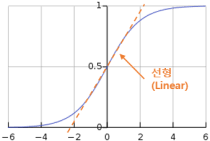


2. 입력에디어톼 가중치는 아래와 같은 분포 성질을 갖는다

- 입력 데이터(x1,x2,...,xn)와 가중치(w1,w2,..wn)는 서로 독립이다.

- 입력 데이터의 각 차원 xi는 같은 분포이고 서로 독립인 i.i.d를 만족한다

- 가중치의 각 차원 wi도 같은 분포이고 서로 독립인 i.i.d를 만족한다

- 각 xi와 wi(i=1,2,...,n)는 평균이 0인 분포를 따르고 E(wi)=0이고 E(xi) =0 이다

*각각의 random variable들이 독립 + 동일한 확률분포를 가지는 분포를 뜻

https://cyber0946.tistory.com/115


#### Xavier 초기화 식의 유도 과정

활성 함수로 선형 함수로 가정했기에 뉴런의 출력 y = 가중합산 z

- 두 번째 줄 성립 이유

https://datascienceschool.net/02%20mathematics/07.03%20%EB%B6%84%EC%82%B0%EA%B3%BC%20%ED%91%9C%EC%A4%80%ED%8E%B8%EC%B0%A8.html 


- 모든 xi와 wi는 같은 분포를 따르기에 분산이 같다.

-  Var(wi) = 1/n 이므로, 가중치의 분산 입력 데이터 개수 n에 반비례하도록 초기화를 하는 방식으로 볼 수 있고, 가중치 분포는 가우시안 분포 혹은 균등 분포로 정의가 가능합니다.

- 정리, Xavier 초기화를 이용해서 신경망 초기화 시, 입력 데이터가 계층을 여러 번 통과하여도 분산 유지가 잘 되고 출력값이 0으로 변하는 현상도 포화하는 현상도 일어나지 않아서 신경망의 학습이 진행이 된다.


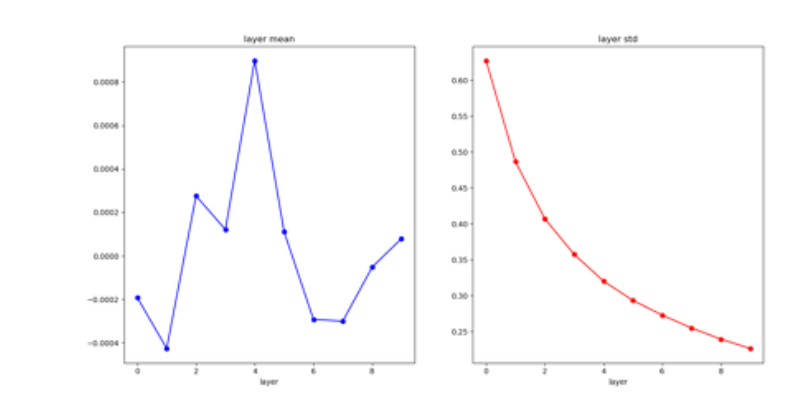

### He 초기화

활성함수가 ReLU일 경우 Xavier 초기화를 사용하지 못하게 됩니다. 그 이유는 Xavier 초기화는 시그모이드 계열 함수를 위해서 만들어졌기 때문입니다. 그렇다고 ReLU를 버릴 순 없습니다. 그래서 Xavier초기화의 한계점인 ReLU함수를 쓰지 못한다는 것을 해결하기 위해서 He 초기화가 나왔습니다.

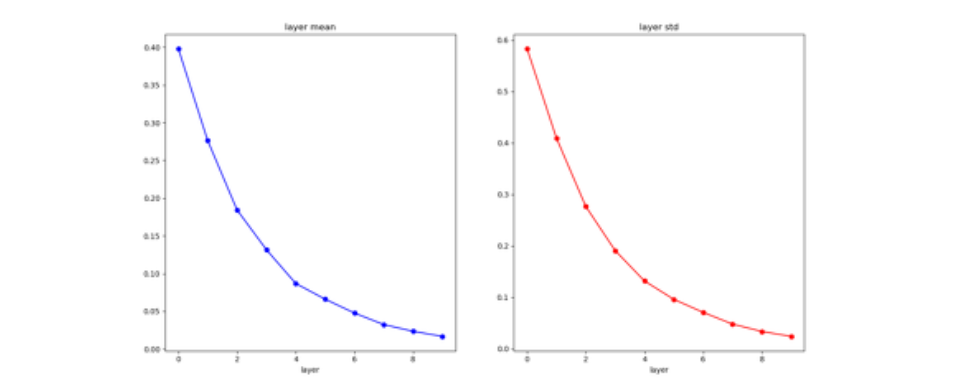

He초기화도 뉴런의 입력 데이터와 출력 데이터의 분산을 같게 만들어주지만 ReLU사용 시 출력 분산이 절반으로 줄어드는 현상을 해결하기 위해서 가중치의 분산을 2/n으로 한다. ReLU의 특성 때문에 데이터가 0으로 몰려 있지만 양수 구간에서 데이터는 고르게 퍼져있습니다.

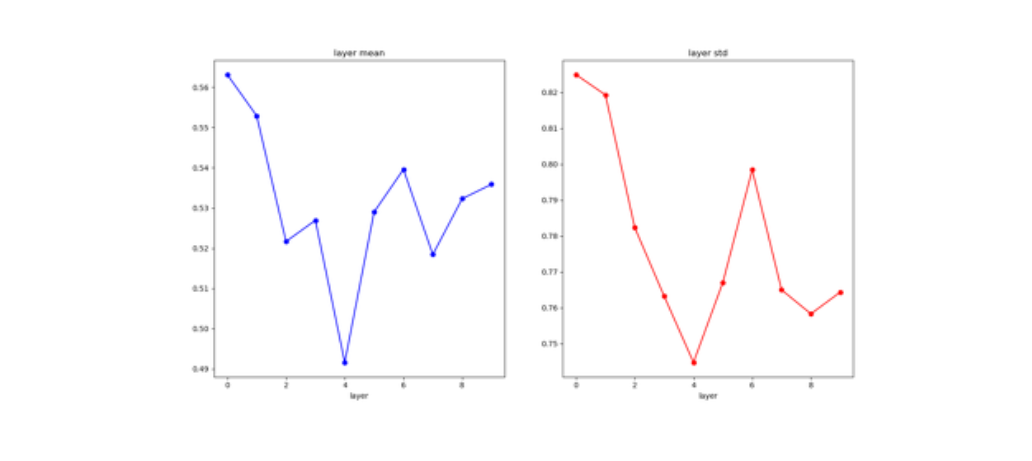

*출력 분산이 절반으로 줄어드는 이유는 ReLU는 음수 영역을 쓰지 못하기 때문입니다.

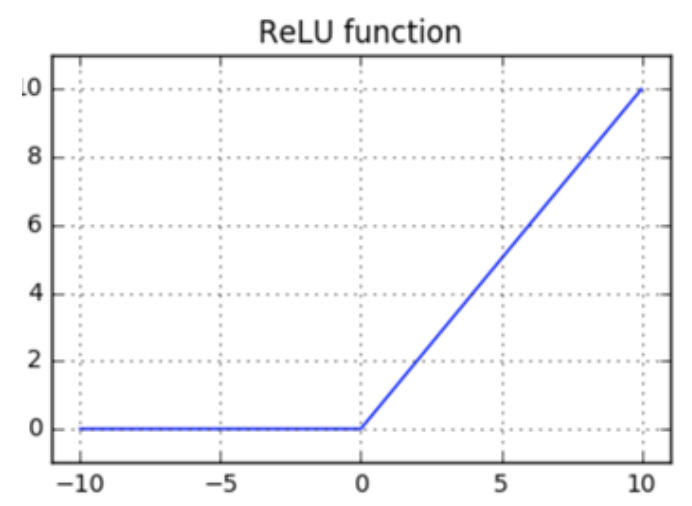